In [8]:
#!pip install requests
#!pip install gmaps

In [154]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import requests
import gmaps
import os


# Display the data table for preview
Airports_data_path = "Airport_data.csv"
Population_Density_path = "Population_Density.csv"
Confirmed_Cases_path = "Confirmed_Cases_By_State.csv"

# Read the mouse data and the study results
Airports = pd.read_csv(Airports_data_path)
Population_Density = pd.read_csv(Population_Density_path)
Confirmed_Cases = pd.read_csv(Confirmed_Cases_path)

# Import API key
from api_keys import g_key

In [138]:
#Show output
Airports.head()

,Airport,State,Code,Rank,Passengers 2009,Rank.1,Passengers 2018,Rank.2,Passengers 2019\t,Recent Change,Percent change
0,"Atlanta, GA (Hartsfield-Jackson Atlanta Intern...",Georgia,ATL,1.0,"42,155,204",1.0,"51,870,637",1.0,"53,504,022",26.9,3.1
1,"Los Angeles, CA (Los Angeles International)",California,LAX,3.0,"27,496,850",2.0,"42,736,738",2.0,"42,944,850",56.2,0.5
2,"Chicago, IL (Chicago O'Hare International)",Illinois,ORD,2.0,"31,124,151",3.0,"39,907,680",3.0,"40,888,335",31.4,2.5
3,"Dallas/Fort Worth, TX (Dallas/Fort Worth Inter...",Texas,DFW,4.0,"26,606,411",4.0,"32,799,363",4.0,"35,778,123",34.5,9.1
4,"Denver, CO (Denver International)",Colorado,DEN,5.0,"23,967,369",5.0,"31,364,910",5.0,"33,592,342",40.2,7.1


In [139]:
#dropping columns
Airports = Airports.drop(columns=["Rank", "Passengers 2009", "Rank.1", "Passengers 2018",
                                 "Recent Change", "Percent change"])
#renaming columns    
Airports = Airports.rename(columns={"Rank.2": "Rank",
                                   "Passengers 2019\t": "Passengers"})
#Show output
Airports.head(15)

,Airport,State,Code,Rank,Passengers
0,"Atlanta, GA (Hartsfield-Jackson Atlanta Intern...",Georgia,ATL,1.0,"53,504,022"
1,"Los Angeles, CA (Los Angeles International)",California,LAX,2.0,"42,944,850"
2,"Chicago, IL (Chicago O'Hare International)",Illinois,ORD,3.0,"40,888,335"
3,"Dallas/Fort Worth, TX (Dallas/Fort Worth Inter...",Texas,DFW,4.0,"35,778,123"
4,"Denver, CO (Denver International)",Colorado,DEN,5.0,"33,592,342"
5,"New York, NY (John F. Kennedy International)",New York,JFK,6.0,"31,055,358"
6,"San Francisco, CA (San Francisco International)",California,SFO,7.0,"27,708,869"
7,"Seattle, WA (Seattle/Tacoma International)",Washington,SEA,8.0,"24,968,689"
8,"Orlando, FL (Orlando International)",Florida,MCO,9.0,"24,572,339"
9,"Las Vegas, NV (McCarran International)",Nevada,LAS,10.0,"24,462,857"


In [140]:
#dropping NAs
clean_airports = Airports.dropna(inplace=True)

#setting index as State
clean_airports = Airports.set_index("State")

#making dataframe
clean_airports = pd.DataFrame(clean_airports['Passengers'])

#reseting index
clean_airports = clean_airports.reset_index()

#removing ','
clean_airports['Passengers'] = clean_airports['Passengers'].str.replace(',','')

#filling NAs with 0
clean_airports['Passengers'] = clean_airports['Passengers'].fillna(0)

#making Passengers an integer
clean_airports['Passengers'] = clean_airports['Passengers'].astype(int)

#Show output
clean_airports.head(10)

,State,Passengers
0,Georgia,53504022
1,California,42944850
2,Illinois,40888335
3,Texas,35778123
4,Colorado,33592342
5,New York,31055358
6,California,27708869
7,Washington,24968689
8,Florida,24572339
9,Nevada,24462857


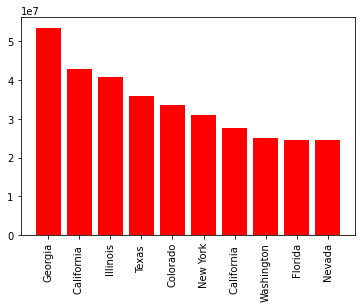

In [141]:
#putting clean_ariport data in x axis
x_axis = np.arange(len(clean_airports))

#setting tick locations
tick_locations = [value for value in x_axis]

#setting up bar graph
plt.bar(x_axis, clean_airports["Passengers"], color='r', align="center")
plt.xticks(tick_locations, clean_airports["State"], rotation="vertical")

#Show output
plt.show()

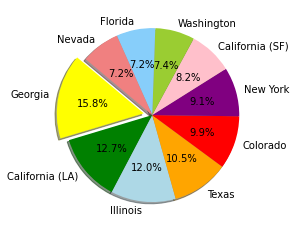

In [142]:
#setting the top states
states = ['Georgia', 'California (LA)', 'Illinois','Texas', 'Colorado', 'New York',  
          'California (SF)', 'Washington','Florida', 'Nevada']
#setting the colors to use for the pie chart
colors = ["yellow","green","lightblue","orange","red","purple","pink","yellowgreen","lightskyblue","lightcoral"]

#exploding the highest value out
explode = (0.1,0,0,0,0,0,0,0,0,0)

#Setting up the pie plot
plt.pie(clean_airports['Passengers'], explode=explode, labels=states, colors=colors, autopct='%1.1f%%', shadow=True, startangle = 140)

#Show output
plt.show()

In [143]:
#removing the "," from the numbers
Confirmed_Cases['Confirmed'] = Confirmed_Cases['Confirmed'].str.replace(',','')
Confirmed_Cases['Deaths'] = Confirmed_Cases['Deaths'].str.replace(',','')

#making an integer
Confirmed_Cases['Confirmed'] = Confirmed_Cases['Confirmed'].astype(int)

#putting in order by the highest
clean_cases = Confirmed_Cases.sort_values(by="Confirmed", ascending=False)

#dropping everything but the top 10 states
clean_cases = clean_cases.drop([42,30,14,22,49,21,0,23,25,40,18,5,36,17,20,44,15,47,46,3,16,28,24,6,27,31,12,37,
                               48,41,39,34,26,7,29,1,50,8,19,11,45], axis=0)

#Show output
clean_cases

,State,Confirmed,Deaths
4,California,3169935,38224
43,Texas,2294073,35152
9,Florida,1676171,25833
32,New York,1361151,42610
13,Illinois,1112143,18964
35,Ohio,878284,10931
38,Pennsylvania,818369,21105
2,Arizona,738561,12643
33,North Carolina,733010,8915
10,Georgia,731826,12135


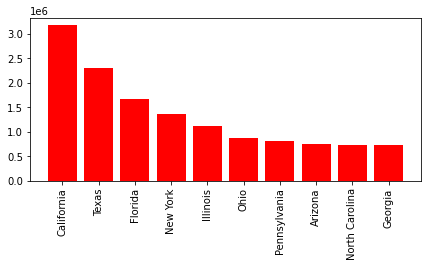

In [144]:
#setting the x axis
x_axis = np.arange(len(clean_cases))

#setting tick locations
tick_locations = [value for value in x_axis]

#setting figure size
plt.figure(figsize=(7,3))

#setting the bar graph
plt.bar(x_axis, clean_cases["Confirmed"], color='r', align="center")
plt.xticks(tick_locations, clean_cases["State"], rotation="vertical")

#Show output
plt.show()

In [145]:
#pulling in data for csv file
cases_data_path = "Covid_cases_lng_lat.csv"

#reading data
cases_data = pd.read_csv(cases_data_path)

#Show output
cases_data.head(10)

,State,Confirmed,Lng,Lat
0,Arizona,"738,561",-111.0939,34.0489
1,California,"3,169,935",-119.4179,36.7783
2,Florida,"1,676,171",-81.5158,27.6648
3,Georgia,"731,826",-82.9001,32.1658
4,Illinois,"1,112,143",-89.3985,40.6331
5,New York,"1,361,151",-74.0060,40.7128
6,North Carolina,"733,010",-79.0193,35.7596
7,Ohio,"878,284",-82.9071,40.4173
8,Pennsylvania,"818,369",-77.1945,41.2033
9,Texas,"2,294,073",-99.9018,31.9686


In [155]:
#convert to list
confirmed_data = cases_data['Confirmed'].tolist()

#getting the Lat and Lng from the data
marker_locations = cases_data[['Lat', 'Lng']]

#getting info from API key
gmaps.configure(api_key=g_key)

#setting the map
fig_map = gmaps.figure()
markers = gmaps.marker_layer(marker_locations, 
                             info_box_content=[f'Confirmed: {confirmed}' for confirmed in confirmed_data])
fig_map.add_layer(markers)

#Show output
fig_map


Figure(layout=FigureLayout(height='420px'))

In [146]:
#making an integer
Population_Density['Pop'] = Population_Density['Pop'].astype(int)

#putting in order by the highest
clean_population = Population_Density.sort_values(by="Pop", ascending=False)

#Show output 
clean_population.head(10)

,State,Density,Pop,LandArea
10,California,254.2929,39613500,155779
22,Texas,113.8080,29730300,261232
7,Florida,409.2233,21944600,53625
6,New York,409.5404,19300000,47126
9,Pennsylvania,286.1699,12804100,44743
11,Illinois,226.3964,12569300,55519
8,Ohio,286.6939,11714600,40861
16,Georgia,188.3053,10830000,57513
12,North Carolina,220.1037,10701000,48618
17,Michigan,176.7352,9992430,56539


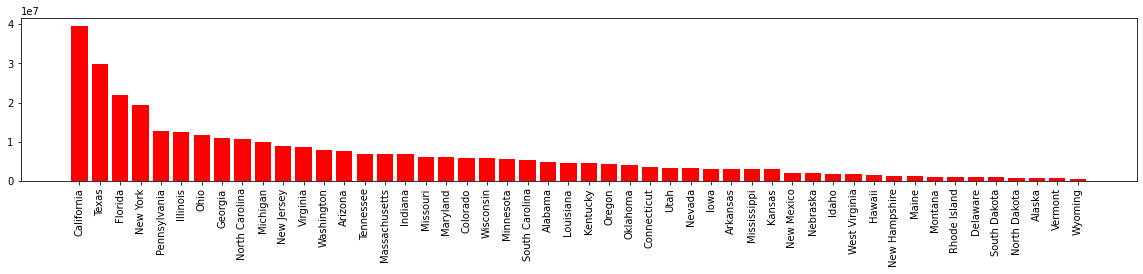

In [148]:
#setting the x axis
x_axis = np.arange(len(clean_population))

#setting the ticks
tick_locations = [value for value in x_axis]

#setting the figure size
plt.figure(figsize=(20,3))

#setting up the bar graph
plt.bar(x_axis, clean_population["Pop"], color='r', align="center")
plt.xticks(tick_locations, clean_population["State"], rotation="vertical")

#Show output
plt.show()

In [149]:
#adding the sum of states that have mulitples
clean_airports = clean_airports.groupby("State").sum()

#reseting the index
clean_airports = clean_airports.reset_index()

#keeping only the spaced between the words of the states
clean_airports["State"]=clean_airports["State"].str.replace(" $", "")

#Show output
clean_airports

,State,Passengers
0,California,70653719
1,Colorado,33592342
2,Florida,24572339
3,Georgia,53504022
4,Illinois,40888335
5,Nevada,24462857
6,New York,31055358
7,Texas,35778123
8,Washington,24968689


In [152]:
#combine the data into a single dataset
merge_data_df2 = pd.merge(clean_airports, clean_population, how="inner", on="State")

#dropping columns and keeping the original df as it was
merge_data_df2.drop(columns=["Density", "LandArea"], inplace=True) 

#showing output
merge_data_df2.head(10)

,State,Passengers,Pop
0,California,70653719,39613500
1,Colorado,33592342,5893630
2,Florida,24572339,21944600
3,Georgia,53504022,10830000
4,Illinois,40888335,12569300
5,Nevada,24462857,3185790
6,New York,31055358,19300000
7,Texas,35778123,29730300
8,Washington,24968689,7796940


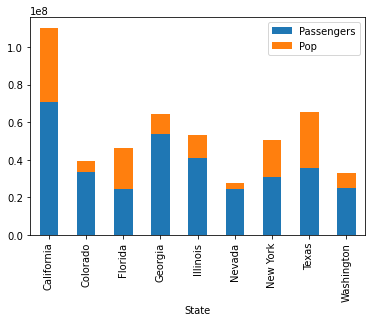

In [153]:
#seting and showing bar plot
ax = merge_data_df2.plot.bar(x='State', stacked=True)